# Simulation 1
See README.md for a short description.

### Importing libraries

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import server as srv
import agent as agn

Setting a random seed

In [2]:
np.random.seed(0)

### Defining the number of ports

In [3]:
nports = 4

### Creating the agent and setting the learning options 

In [4]:
agt = agn.Agent(nports)
agt.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

## Simulation 1.4
We re-run simulation 1.3 for $100$ times in order to collect statistics

In [11]:
nports = 64
ntrials = 100

steps = np.zeros((ntrials,nepisodes))
Q_diag = np.zeros((ntrials,nepisodes))
Q_ndiag = np.zeros((ntrials,nepisodes))
Qs = np.zeros((ntrials,nports+1,nports+1))

for t in tqdm(range(ntrials)):

    agt = agn.Agent(nports,verbose=False)
    agt.set_learning_options(exploration=0.2, 
                             learningrate=0.1, 
                             discount=0.9, 
                             scanprobability=0.1)

    nepisodes = 1000
    for e in range(nepisodes):

        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport)
        agt.reset(env)

        agt.run_episode()
        
        steps[t,e] = agt.steps
        Q_diag[t,e] = np.sum(np.diag(agt.Q))
        Q_ndiag[t,e] = np.sum(agt.Q)
        Qs[t,:,:] = agt.Q

100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 34.15it/s]


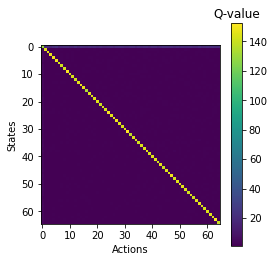

In [12]:
plt.matshow(np.mean(Qs,axis=0))

plt.xlabel('Actions')
plt.ylabel('States')
plt.tick_params(axis='x',bottom=True,top=False,labelbottom=True,labeltop=False)

clb = plt.colorbar()
clb.ax.set_title('Q-value')


plt.savefig('simul1_matrix',dpi=300)

Text(0, 0.5, 'Ratio diagonal/matrix')

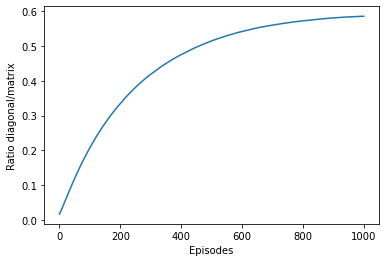

In [13]:
l = np.mean(Q_diag,axis=0) / np.mean(Q_ndiag,axis=0)
plt.plot(range(nepisodes),l)
plt.xlabel('Episodes')
plt.ylabel('Ratio diagonal/matrix')

Text(0, 0.5, 'Number of steps')

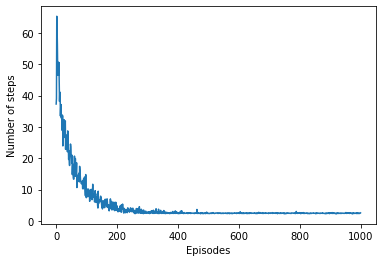

In [14]:
plt.plot(range(nepisodes),np.mean(steps,axis=0))
plt.xlabel('Episodes')
plt.ylabel('Number of steps')

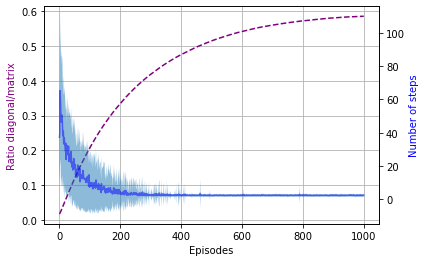

In [15]:
_,ax1 = plt.subplots()
plt.grid()

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Ratio diagonal/matrix',c='purple')
ax1.plot(range(nepisodes),l,c='purple',linestyle='dashed')

ax2 = ax1.twinx()
x = range(nepisodes); y = np.mean(steps,axis=0); ystd = yerr=np.std(steps,axis=0)
ax2.plot(x,y,c='blue',alpha=.5)
ax2.fill_between(x,y-ystd,y+ystd,alpha=.5)
ax2.set_ylabel('Number of steps',c='blue')



plt.savefig('simul1_plots',dpi=300)